In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("D:/DataScience/Python/dataset/TaxiFare.csv")

In [4]:
df.shape

(50000, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [6]:
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [7]:
df.tail()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
49995,25:15.0,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1
49996,19:18.0,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1
49997,53:00.0,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1
49998,09:00.0,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2
49999,13:14.0,10.9,2010-01-13 08:13:14 UTC,-73.932603,40.763805,-73.932603,40.763805,1


In [36]:
df.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734371,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


In [8]:
df.corr()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
amount,1.000000,0.005944,-0.007338,0.004286,-0.005442,0.016583
longitude_of_pickup,0.005944,1.000000,-0.950588,0.956131,-0.946968,-0.005604
latitude_of_pickup,-0.007338,-0.950588,1.000000,-0.911123,0.928189,0.003237
longitude_of_dropoff,0.004286,0.956131,-0.911123,1.000000,-0.982117,-0.004936
latitude_of_dropoff,-0.005442,-0.946968,0.928189,-0.982117,1.000000,0.002958
no_of_passenger,0.016583,-0.005604,0.003237,-0.004936,0.002958,1.000000


<AxesSubplot:>

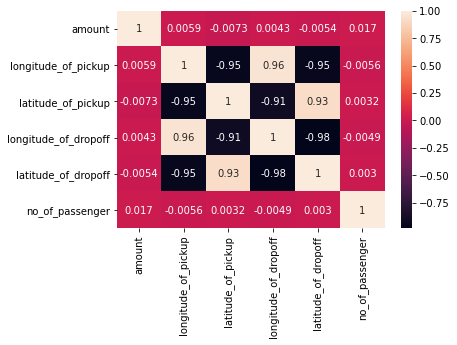

In [35]:
sns.heatmap(df.corr(),annot=True)

In [38]:
df['date_time_of_pickup']=pd.to_datetime(df['date_time_of_pickup'],format='%Y-%m-%d %H:%M:%S UTC')


In [39]:
def split_datetime(df):          
    # Split datetime column
    datetime = pd.to_datetime(df["date_time_of_pickup"])
    df['day_of_week'] = datetime.dt.dayofweek
    df['day_of_month'] = datetime.dt.day
    df['month'] = datetime.dt.month
    df['year'] = datetime.dt.year
    df['hour'] = datetime.dt.hour 
    return df

df = split_datetime(df)

In [40]:
df.head()

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,day_of_week,day_of_month,month,year,hour
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,0,15,6,2009,17
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,1,5,1,2010,16
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,3,18,8,2011,0
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,5,21,4,2012,4
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,1,9,3,2010,7


In [41]:
df = df[df.amount > 0.0]

In [43]:
df.shape

(49991, 12)

In [45]:
def distance(lat1, lat2, lon1,lon2):
    p = 0.017453292519943295 # Pi/180
    a = 0.5 - np.cos((lat2 - lat1) * p)/2 + np.cos(lat1 * p) * np.cos(lat2 * p) * (1 - np.cos((lon2 - lon1) * p)) / 2
    return 0.6213712 * 12742 * np.arcsin(np.sqrt(a))


In [46]:
df['trip_distance']=df.apply(lambda row:distance(row['latitude_of_pickup'],row['latitude_of_dropoff'],row['longitude_of_pickup'],row['longitude_of_dropoff']),axis=1)


In [47]:
df=df.loc[df['trip_distance']>0]


In [48]:
df.columns

Index(['amount', 'date_time_of_pickup', 'longitude_of_pickup',
       'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff',
       'no_of_passenger', 'day_of_week', 'day_of_month', 'month', 'year',
       'hour', 'trip_distance'],
      dtype='object')

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48542 entries, 0 to 49998
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   amount                48542 non-null  float64            
 1   date_time_of_pickup   48542 non-null  datetime64[ns, UTC]
 2   longitude_of_pickup   48542 non-null  float64            
 3   latitude_of_pickup    48542 non-null  float64            
 4   longitude_of_dropoff  48542 non-null  float64            
 5   latitude_of_dropoff   48542 non-null  float64            
 6   no_of_passenger       48542 non-null  int64              
 7   day_of_week           48542 non-null  int64              
 8   day_of_month          48542 non-null  int64              
 9   month                 48542 non-null  int64              
 10  year                  48542 non-null  int64              
 11  hour                  48542 non-null  int64              
 12  trip

C:\Users\adity\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='amount', ylabel='Density'>

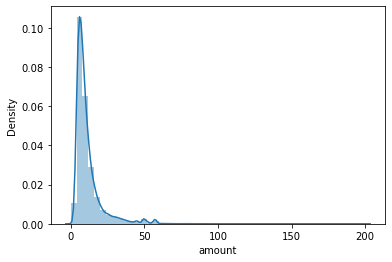

In [124]:
sns.distplot(df.amount)

C:\Users\adity\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='amount'>

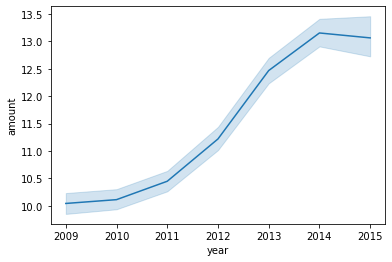

In [112]:
#df.groupby("year")["amount"].mean().plot()
sns.lineplot(df.year,df.amount)

C:\Users\adity\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.0, 1000.0)

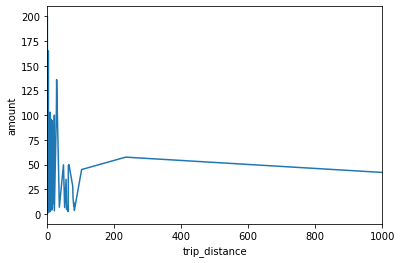

In [116]:
sns.lineplot(df.trip_distance,df.amount)
plt.xlim(0, 1000)
# for larger distances the amount remains almost constant

C:\Users\adity\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.0, 20.0)

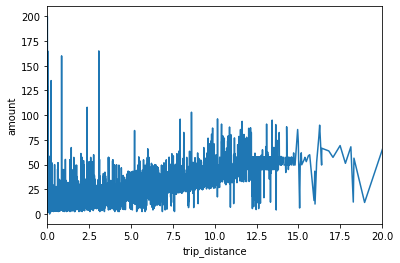

In [118]:
sns.lineplot(df.trip_distance,df.amount)
plt.xlim(0,20)

# we can see amount increases for smaller distaces linearly but for larger distances the amonut remains almost constant

C:\Users\adity\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.0, 5.0)

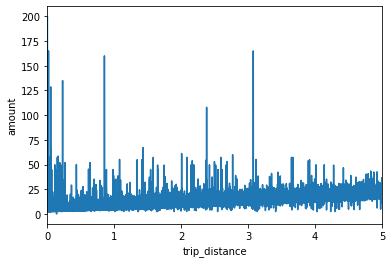

In [119]:
sns.lineplot(df.trip_distance,df.amount)
plt.xlim(0,5)

<AxesSubplot:>

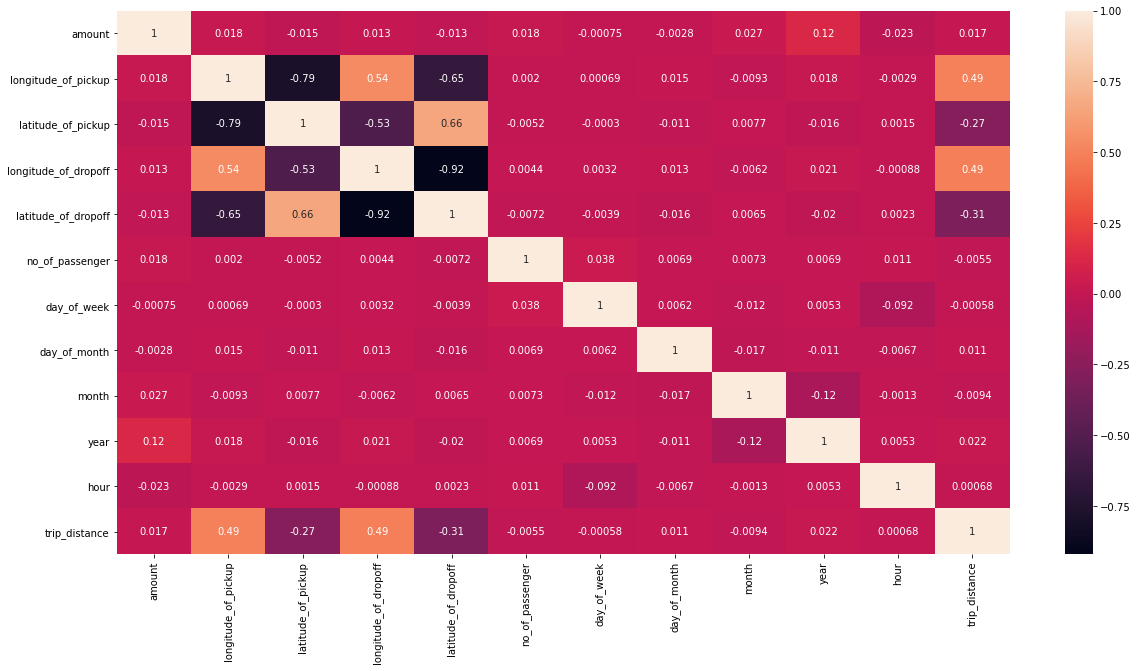

In [120]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='month', ylabel='amount'>

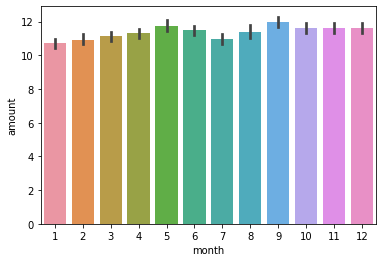

In [121]:
sns.barplot(y=df["amount"],x=df["month"])

<AxesSubplot:xlabel='no_of_passenger', ylabel='amount'>

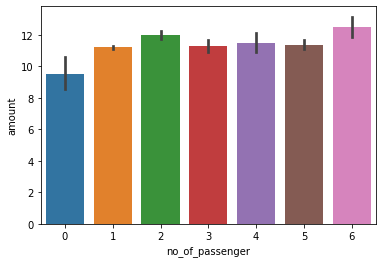

In [122]:
sns.barplot(y=df["amount"],x=df["no_of_passenger"])

<AxesSubplot:xlabel='day_of_week', ylabel='amount'>

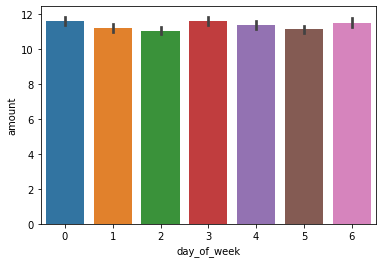

In [123]:
sns.barplot(y=df["amount"],x=df["day_of_week"])

<AxesSubplot:xlabel='day_of_week', ylabel='trip_distance'>

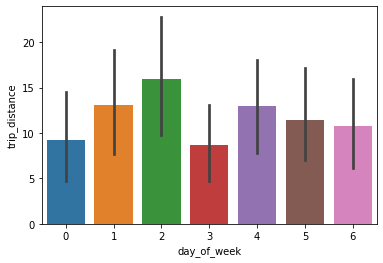

In [125]:
sns.barplot(y=df["trip_distance"],x=df["day_of_week"])

<AxesSubplot:xlabel='day_of_month', ylabel='amount'>

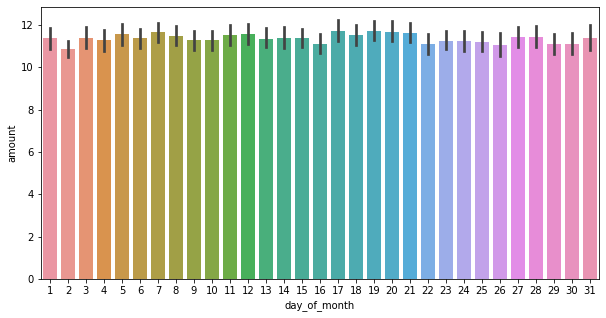

In [127]:
plt.figure(figsize=(10,5))
sns.barplot(y=df["amount"],x=df["day_of_month"])

C:\Users\adity\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hour', ylabel='amount'>

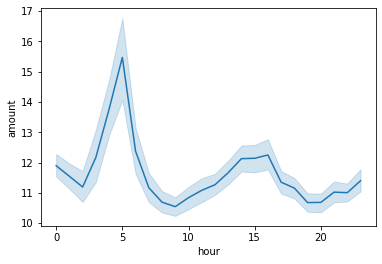

In [128]:
sns.lineplot(df.hour,df.amount)

# Random Forest Model

In [70]:
x=df[['longitude_of_pickup','latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff',
       'no_of_passenger', 'day_of_week', 'day_of_month', 'month', 'year',
       'hour', 'trip_distance']]

In [71]:
y=df.iloc[:,df.columns=="amount"]

In [72]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 1111)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(36406, 11)
(12136, 11)
(36406, 1)
(12136, 1)


In [73]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train = sc.fit_transform(x_train) 
x_test = sc.transform(x_test)  

In [96]:
# from sklearn.ensemble import RandomForestRegressor
# rf = RandomForestRegressor(n_estimators=10,random_state=0)
# rf.fit(x_train, y_train)
# y_pred = rf.predict(x_test)


from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
rf = Pipeline([('std', StandardScaler()),
                #('pca', PCA()),
                ('classifier', RandomForestRegressor())])

rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

C:\Users\adity\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


In [97]:
rf.score(x_train, y_train)

0.9724194837274401

In [98]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred).round()

14.0

In [99]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8517382534966483

# Hypertuning(RF)

In [100]:
from sklearn.model_selection import GridSearchCV

In [104]:
param_grid = {'classifier__n_estimators': [50],
              'classifier__max_depth': [5, 10, 15,],
              'classifier__min_samples_split': [2, 3, 5],
              'classifier__min_samples_leaf': [1, 3, 4]
             }

grid_search = GridSearchCV(rf, param_grid, cv=2)
grid_search.fit(x_train, y_train)

C:\Users\adity\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\adity\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\adity\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\adity\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Plea

C:\Users\adity\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\adity\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\adity\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\adity\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Plea

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('std', StandardScaler()),
                                       ('classifier',
                                        RandomForestRegressor())]),
             param_grid={'classifier__max_depth': [5, 10, 15],
                         'classifier__min_samples_leaf': [1, 3, 4],
                         'classifier__min_samples_split': [2, 3, 5],
                         'classifier__n_estimators': [50]})

In [105]:
grid_search.best_params_

{'classifier__max_depth': 15,
 'classifier__min_samples_leaf': 3,
 'classifier__min_samples_split': 2,
 'classifier__n_estimators': 50}

In [106]:
grid_search.score(x_train, y_train)

0.9091709027809349

In [108]:
y_pred_gs = grid_search.predict(x_test)

In [109]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred_gs).round()

14.0

In [110]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_gs)

0.8509920564721456